# Facial Emotion Detection using Convolution Neural Network


Joshua Mani Vinod (B210616EC) <br>
P Varun (B210689EC)

## Aim
Implementing a Facial Emotion Detector using a Convolutional Neural Network (CNN)<br>

## Theory
The CNN architecture consists of two convolutional layers followed by max pooling layers, which helped in extracting and learning discriminative features from the input images. <br>
Finally added a flattening layer and fully connected layer and passed it through softmax activation function for multiclass classification.<br>
After training the model using the Adam optimizer and sparse categorical cross-entropy loss function, it achieved a satisfactory level of accuracy on both the training and testing sets. 

### Importing necessary libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array, load_img

### Function to load and preprocess images from a directory

In [2]:
def load_images_from_folder(folder, target_size=(48, 48)):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), color_mode='grayscale', target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return images

Load and preprocess images for training <br>
0- Angry<br>
1- Happy<br>
2- Sad 

In [3]:
train_angry = load_images_from_folder("Emotions Dataset/train/angry")
train_happy = load_images_from_folder("Emotions Dataset/train/happy")
train_sad = load_images_from_folder("Emotions Dataset/train/sad")
train_images = np.array(train_angry + train_happy + train_sad)
train_labels = np.array([0]*len(train_angry) + [1]*len(train_happy) + [2]*len(train_sad))

Load and preprocess images for testing

In [4]:
test_angry = load_images_from_folder("Emotions Dataset/test/angry")
test_happy = load_images_from_folder("Emotions Dataset/test/happy")
test_sad = load_images_from_folder("Emotions Dataset/test/sad")
test_images = np.array(test_angry + test_happy + test_sad)
test_labels = np.array([0]*len(test_angry) + [1]*len(test_happy) + [2]*len(test_sad))

Normalize pixel values to range [0, 1]

In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

Reshape images to add a channel dimension

In [6]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

### Split the data into training and validation sets

In [7]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define CNN Architecture

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

### Compile the Model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [10]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(val_images, val_labels))

Epoch 1/20
170/170 [==============================] - 43s 252ms/step - loss: 1.0054 - accuracy: 0.4999 - val_loss: 0.9571 - val_accuracy: 0.5412
Epoch 2/20
170/170 [==============================] - 42s 249ms/step - loss: 0.9051 - accuracy: 0.5854 - val_loss: 0.8810 - val_accuracy: 0.6118
Epoch 3/20
170/170 [==============================] - 43s 255ms/step - loss: 0.8056 - accuracy: 0.6429 - val_loss: 0.8776 - val_accuracy: 0.6044
Epoch 4/20
170/170 [==============================] - 44s 261ms/step - loss: 0.6813 - accuracy: 0.7038 - val_loss: 0.7069 - val_accuracy: 0.6963
Epoch 5/20
170/170 [==============================] - 43s 253ms/step - loss: 0.5702 - accuracy: 0.7591 - val_loss: 0.7143 - val_accuracy: 0.7199
Epoch 6/20
170/170 [==============================] - 43s 255ms/step - loss: 0.4688 - accuracy: 0.8053 - val_loss: 0.6884 - val_accuracy: 0.7360
Epoch 7/20
170/170 [==============================] - 43s 255ms/step - loss: 0.3562 - accuracy: 0.8592 - val_loss: 0.6961 - val_ac

### Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

72/72 [==============================] - 5s 71ms/step - loss: 1.4484 - accuracy: 0.7770
Test accuracy: 0.7769973874092102


### Plot training & validation accuracy values

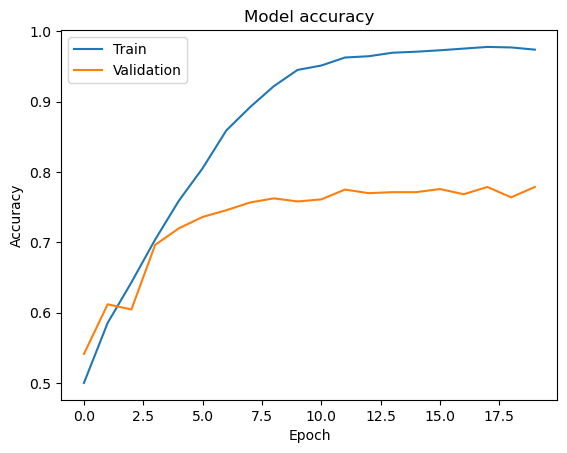

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Get predictions for the training set

170/170 [==============================] - 12s 69ms/step


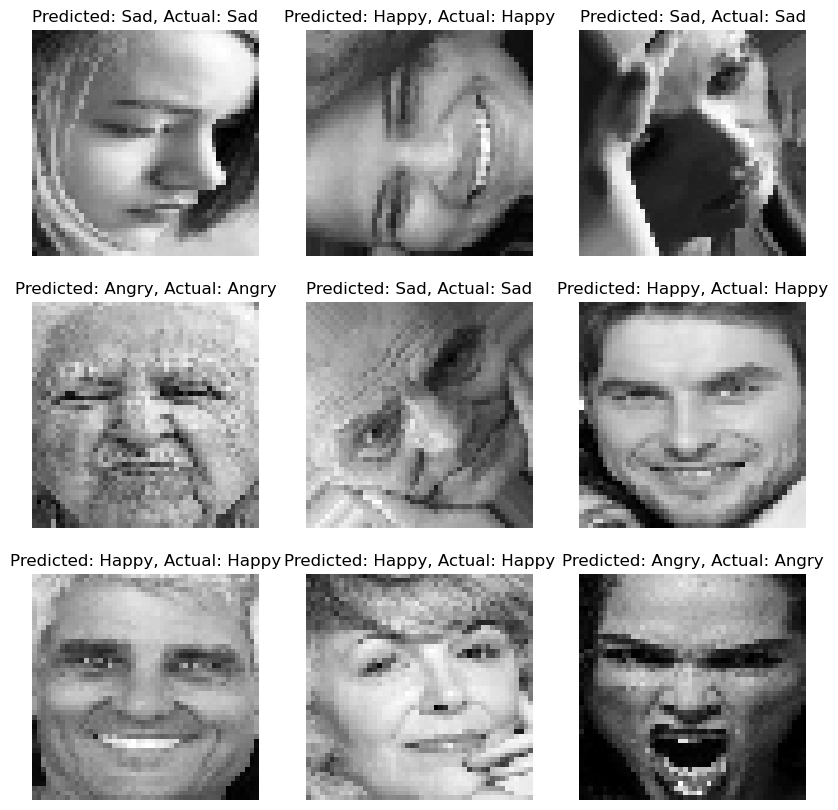

In [13]:
train_predictions = model.predict(train_images)

# Display a few sample images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].reshape(48, 48), cmap='gray')
    emotion_labels = ['Angry', 'Happy', 'Sad']
    plt.title(f"Predicted: {emotion_labels[np.argmax(train_predictions[i])]}, Actual: {emotion_labels[np.argmax(train_predictions[i])]}")
    plt.axis('off')
plt.show()

## Get predictions for the testing set

72/72 [==============================] - 5s 68ms/step


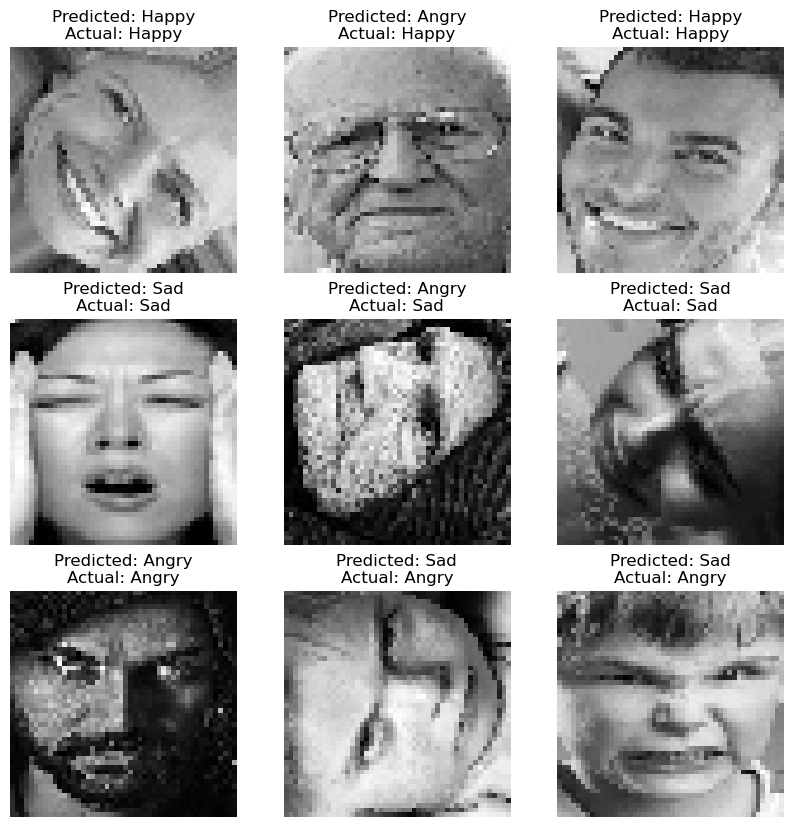

In [15]:
# Initialize counters for each emotion
happy_count = 0
sad_count = 0
angry_count = 0
test_predictions = model.predict(test_images)

# Display a few sample images along with their predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(len(test_images)):
    if happy_count < 3 and test_labels[i] == 1:
        plt.subplot(3, 3, happy_count + 1)
        plt.imshow(test_images[i].reshape(48, 48), cmap='gray')
        predicted_label = np.argmax(test_predictions[i])
        actual_label = test_labels[i]
        plt.title(f"Predicted: {emotion_labels[predicted_label]}\nActual: {emotion_labels[actual_label]}")
        plt.axis('off')
        happy_count += 1
    elif sad_count < 3 and test_labels[i] == 2:
        plt.subplot(3, 3, 3 + sad_count + 1)
        plt.imshow(test_images[i].reshape(48, 48), cmap='gray')
        predicted_label = np.argmax(test_predictions[i])
        actual_label = test_labels[i]
        plt.title(f"Predicted: {emotion_labels[predicted_label]}\nActual: {emotion_labels[actual_label]}")
        plt.axis('off')
        sad_count += 1
    elif angry_count < 3 and test_labels[i] == 0:
        plt.subplot(3, 3, 6 + angry_count + 1)
        plt.imshow(test_images[i].reshape(48, 48), cmap='gray')
        predicted_label = np.argmax(test_predictions[i])
        actual_label = test_labels[i]
        plt.title(f"Predicted: {emotion_labels[predicted_label]}\nActual: {emotion_labels[actual_label]}")
        plt.axis('off')
        angry_count += 1
    if happy_count >= 3 and sad_count >= 3 and angry_count >= 3:
        break

plt.show()


# Result 
Successfully implemented a Facial Emotion Detector using a Convolutional Neural Network (CNN). 
